In [20]:
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [21]:
data_entropy = pd.read_csv('r134aentropymatrix.csv', header = None)
data_pressure = pd.read_csv('data_p.csv', header = None)
data_dt = np.arange(0,105,5)

data_entropy.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.747,1.763,1.779,1.794,1.809,1.824,1.839,1.854,1.869,1.883,...,1.912,1.926,1.940,1.954,1.968,1.981,1.995,2.009,2.022,2.036
1,1.746,1.762,1.778,1.793,1.808,1.823,1.838,1.853,1.868,1.882,...,1.911,1.925,1.939,1.953,1.967,1.980,1.994,2.007,2.021,2.034
2,1.741,1.757,1.773,1.788,1.804,1.819,1.833,1.848,1.863,1.877,...,1.906,1.920,1.934,1.948,1.961,1.975,1.989,2.002,2.016,2.029
3,1.737,1.753,1.769,1.784,1.799,1.814,1.829,1.844,1.859,1.873,...,1.901,1.915,1.929,1.943,1.957,1.971,1.984,1.998,2.011,2.024
4,1.733,1.749,1.765,1.781,1.796,1.811,1.826,1.840,1.855,1.869,...,1.898,1.912,1.926,1.939,1.953,1.967,1.980,1.994,2.007,2.020


In [22]:
data_pressure.head(n=5)

,0
0,1.013
1,1.064
2,1.327
3,1.639
4,2.006


In [23]:
data_dt

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

In [24]:
dt_grid, pressure_grid = np.meshgrid(data_dt, data_pressure)

dt_grid.shape 

(27, 21)

In [25]:
pressure_grid.shape

(27, 21)

In [26]:
data_entropy.shape

(27, 21)

In [27]:
entropyfunction = interpolate.interp2d(dt_grid, pressure_grid, data_entropy)

In [28]:
entropyfunction(5,1)

array([1.763])

Plotting the known values

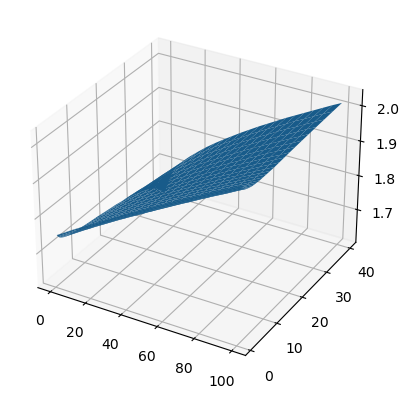

In [29]:
ax = plt.axes(projection = '3d')
ax.plot_surface(dt_grid, pressure_grid, data_entropy)

In [30]:
dt = np.arange(0,100,1)
p = np.arange(1.013,40,0.5)
dt_plot, p_plot = np.meshgrid(dt,p)

In [31]:
interpolated_entropy = entropyfunction(dt, p)

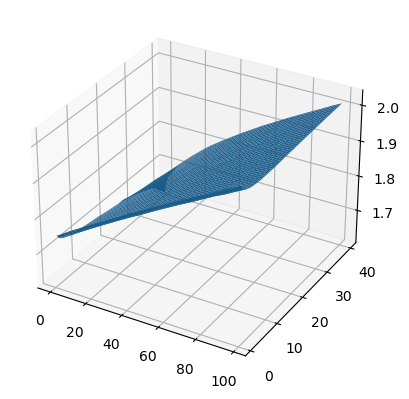

In [32]:
ax = plt.axes(projection = '3d')
ax.plot_surface(dt_plot, p_plot,interpolated_entropy)